statsmodel for  classes and functions for the estimation of many different statistical models.                                                  
pip install statsmodels                                                                                                                                  
pip install import_ipynb    OR   pip install nbformat                                                                                             
pip install scikit-learn



In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sb 

import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression 

import nbformat 
from IPython import get_ipython 


import numpy as np 
import pandas as pd 
import seaborn as sb 
hp_d = pd.read_csv("../Datasets/House_Price.csv", header=0) 
hp_d  
shape_hp = hp_d.shape 
shape_hp  
hp_d.info() 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15

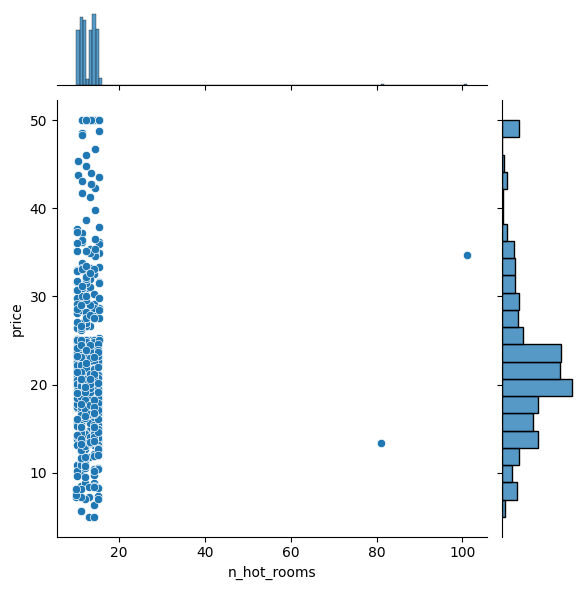

# rainfall to price 

sb.jointplot(x = "rainfall", y = "price", data=hp_d) 


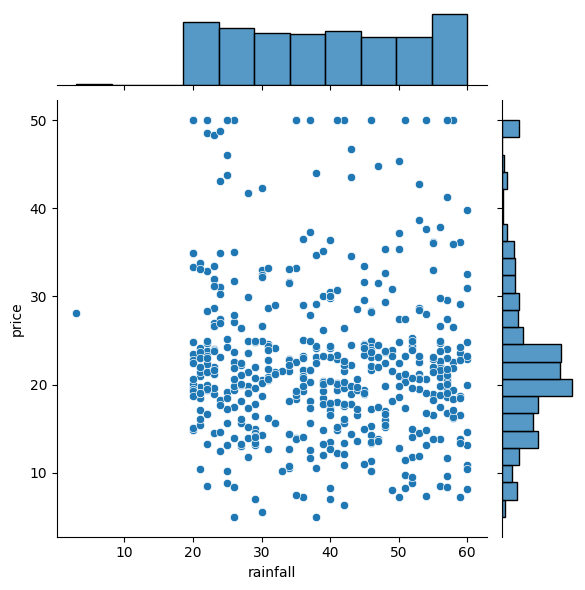

# Airport availability in each city (classification - yes/no) 

sb.countplot(x="airport", data=hp_d)


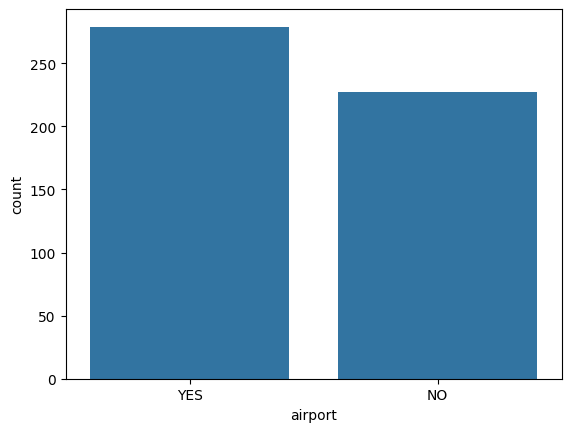

# Water body type count in each city (classification) 

sb.countplot(x="waterbody", data=hp_d) 


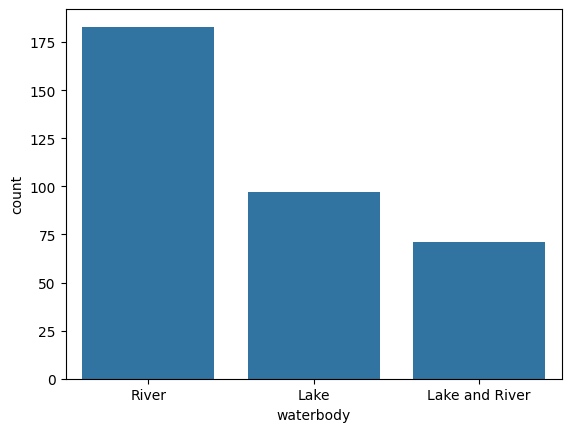

# bus terminal count 

sb.countplot(x="bus_ter", data=hp_d) 


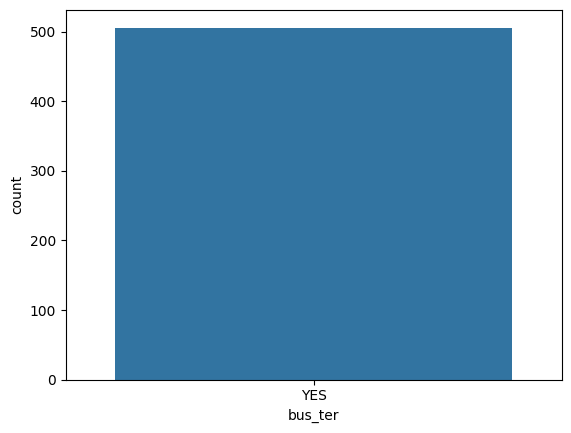

np.percentile(hp_d.n_hot_rooms, [99])      # 99th percentile 
up_pctl = np.percentile(hp_d.n_hot_rooms, [99])[0] 
up_pctl 
hp_gt_pctl = hp_d[(hp_d.n_hot_rooms > up_pctl)] 
hp_gt_pctl 
# n_hot_rooms have upper percentile value 15.39, and the outlier values to be seen here are at index 2 and 423. So we handle it with (* 3x). 

# hp_d.n_hot_rooms[(hp_d.n_hot_rooms > (3 * up_pctl))] = 3 * up_pctl 

hp_d.loc[(hp_d.n_hot_rooms > (3 * up_pctl)), 'n_hot_rooms'] = 3 * up_pctl 
hp_gt_pctl = hp_d[(hp_d.n_hot_rooms > up_pctl)] 
hp_gt_pctl 
np.percentile(hp_d.rainfall, [1])       # 1st percentile of rainfall 
lw_pctl = np.percentile(hp_d.rainfall, [1])[0] 
lw_pctl 
hp_lw_pctl = hp_d[(hp_d.rainfall < lw_pctl)] 
hp_lw_pctl 
# rainfall have lower percentile value 20 , and the outlier values to be seen here is at index 213. So we handle it with (* 0.3x). 

hp_d.loc[(hp_d.rainfall < (0.3 * lw_pctl)), 'rainfall'] = 0.3 * lw_pctl 
hp_lw_pctl = hp_d[(hp_d.rainfall < lw_pctl)] 
hp_lw_pctl 
# sb.jointplot(x=

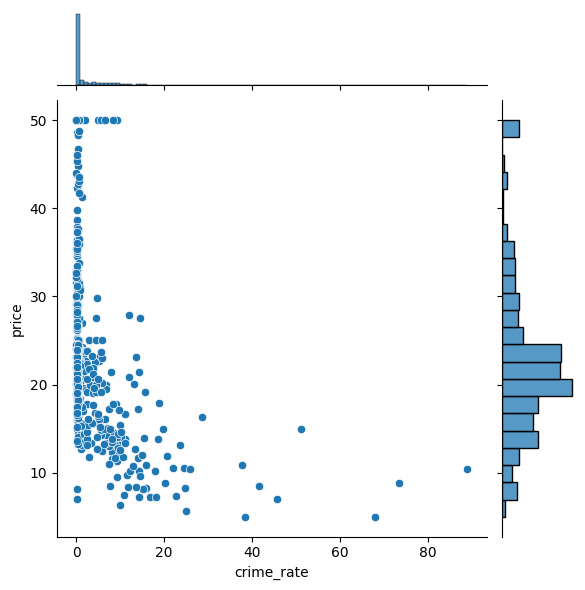

# Updated EDD, newer min for rainfall and max for hotel_room  

hp_d.describe() 
# Missing values handling 
# hp_d = hp_d.fillna(hp_d.mean()) 

hp_d.n_hos_beds = hp_d.n_hos_beds.fillna(hp_d.n_hos_beds.mean()) 
hp_d 

# hp_mean_hosbed = hp_d 
# hp_mean_hosbed 
hp_d.info()    # Updated table columns 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  ai

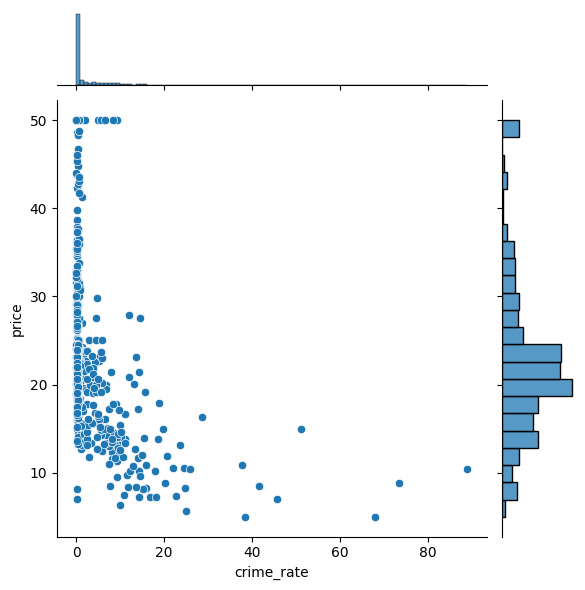

# Since the crime rate is dense near the area of 0 to 1 for X-axis, wee have to add constant to the log function, for better view and calculation along with to get a linear relationship.  

# hp_d.crime_rate = np.log(1 + hp_d.crime_rate) 
hp_d.crime_rate = np.log(3 + hp_d.crime_rate) 
hp_d 
sb.jointplot(x="crime_rate", y="price", data=hp_d)     # Updated crime_rate to work with analysis 


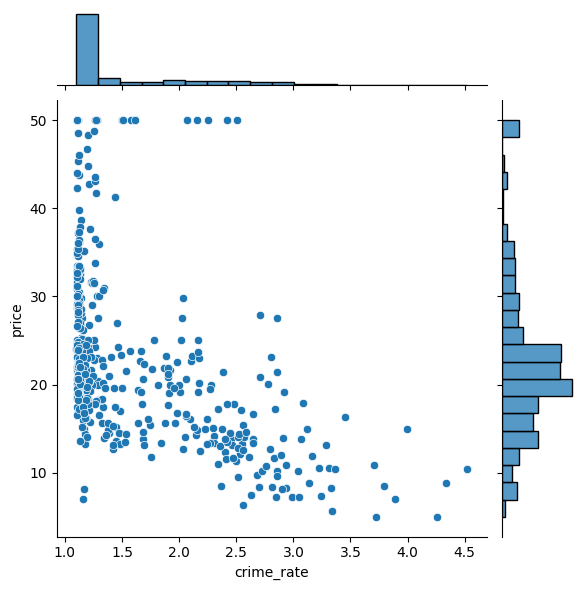

# Avg_dist is avg. dist for all given dists..

hp_d["Avg_dist"] = (hp_d.dist1 + hp_d.dist2 + hp_d.dist3 + hp_d.dist4) / 4 
hp_d 
print(hp_d.info()) 
print(hp_d.describe()) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  wat

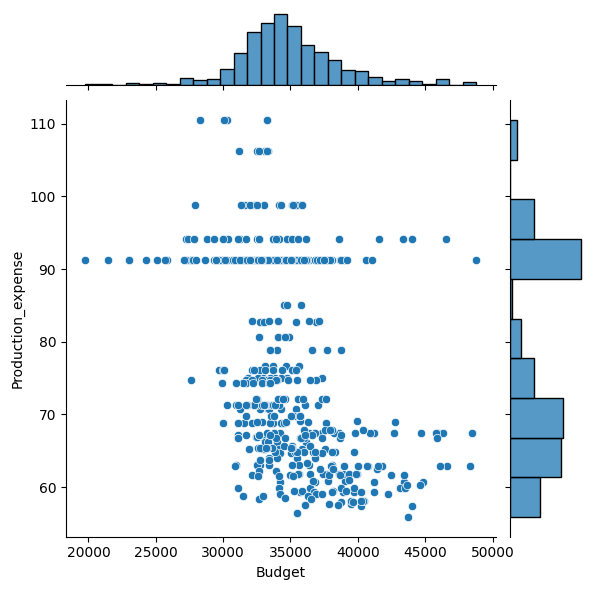

sb.jointplot(data=movie_colen_data, x="Budget", y="Collection") 


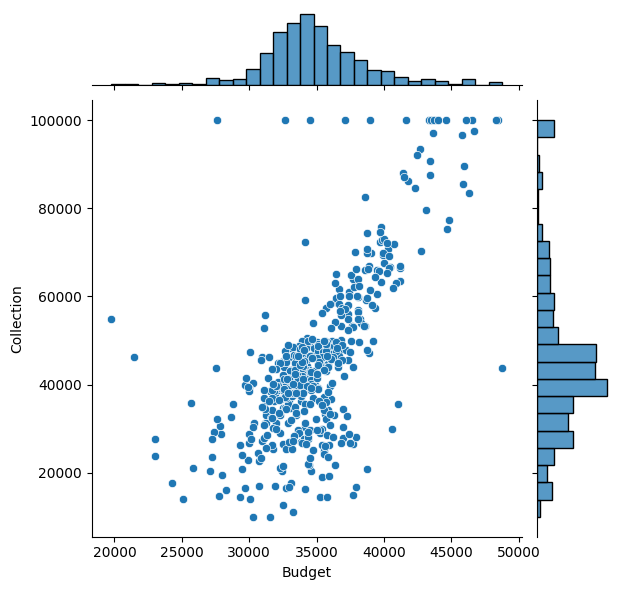

sb.jointplot(data=movie_colen_data,x="Production_expense", y="Collection") 


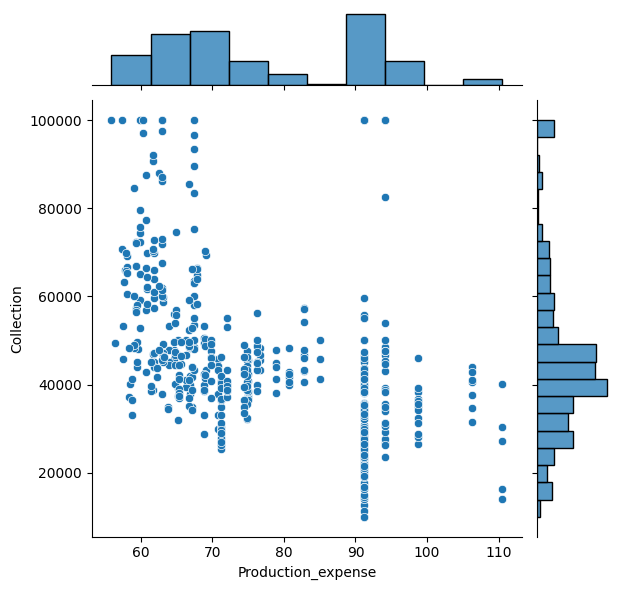

sb.jointplot(data=movie_colen_data, x="Budget", y="Production_expense") 


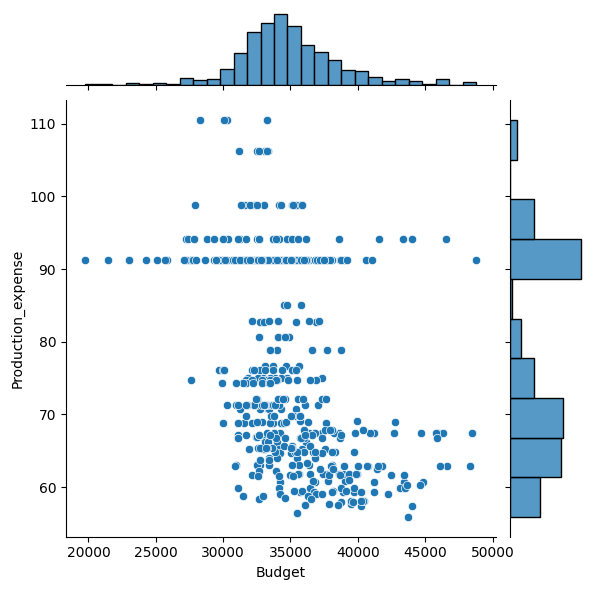

# sb.relplot(data=movie_colen_data, y="Marketin_expense", x="Collection", hue="Movie_length", row="Budget", col="Movie_length") 

# sb.relplot(data=movie_colen_data, x="Marketin_expense", y="Collection")  
sb.jointplot(data=movie_colen_data, x="Marketin_expense", y="Collection")  



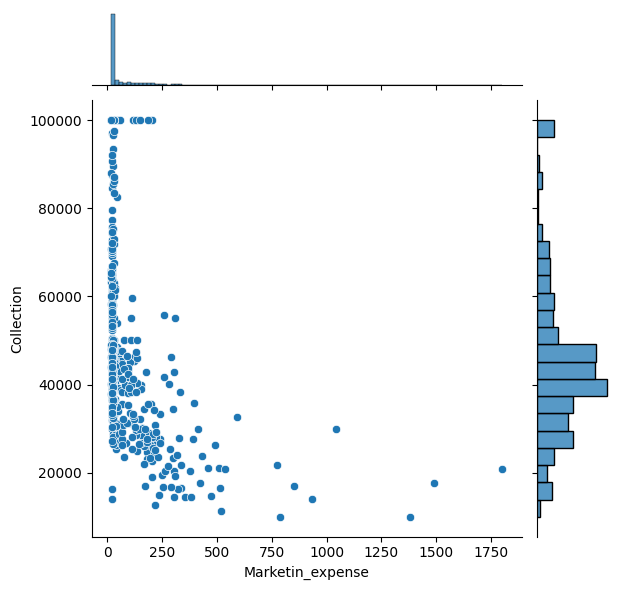

sb.jointplot(data=movie_colen_data, x="Budget", y="Marketin_expense") 


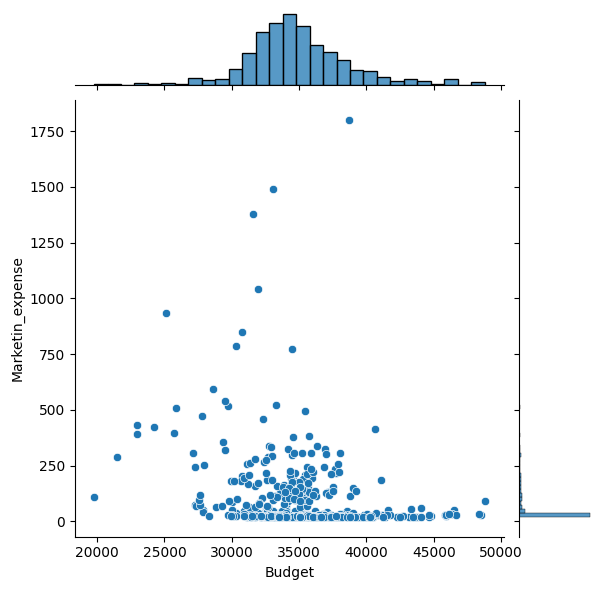

sb.jointplot(y="Marketin_expense", x="Production_expense", data=movie_colen_data) 


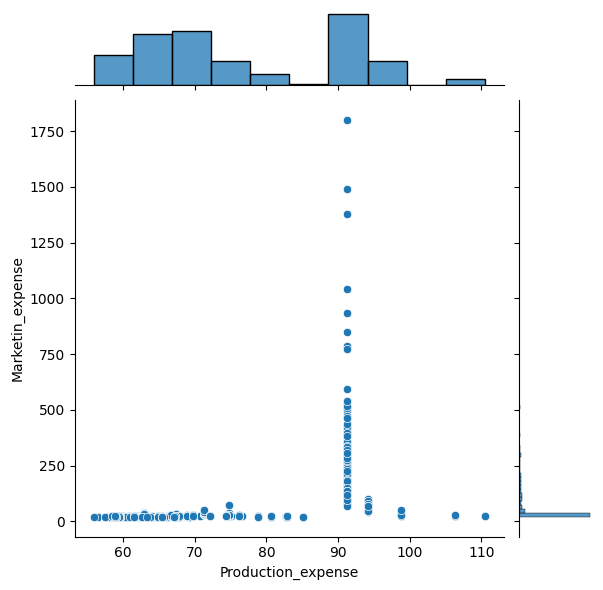

# movie_colen_data.Marketin_expense = np.log(2.5 + movie_colen_data.Marketin_expense) 
# movie_colen_data.Marketin_expense = np.log(3.0 + movie_colen_data.Marketin_expense) 
# movie_colen_data.Marketin_expense = np.log(1.5 + movie_colen_data.Marketin_expense) 
# movie_colen_data.Marketin_expense = np.log(2.0 + movie_colen_data.Marketin_expense) 

movie_colen_data.Marketin_expense = np.log(2.35 + movie_colen_data.Marketin_expense) 
movie_colen_data 
movie_colen_data.describe()     # Updated marketing expense attribute 
sb.jointplot(data=movie_colen_data, x="Marketin_expense", y="Collection")  


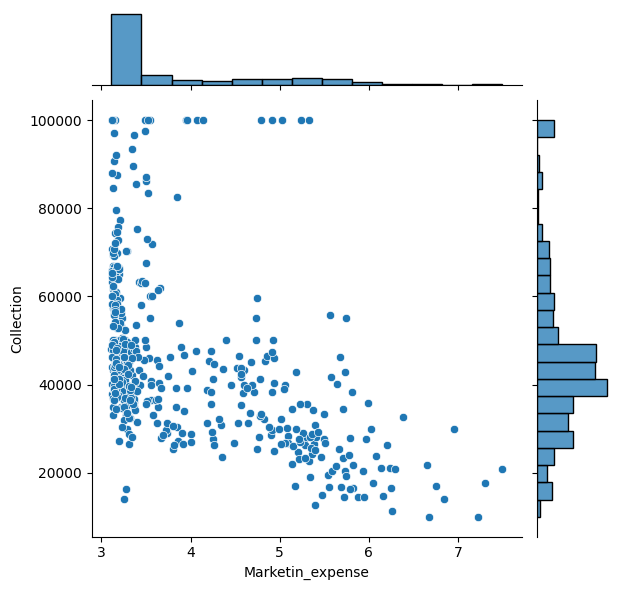

sb.jointplot(data=movie_colen_data, x="Budget", y="Marketin_expense") 


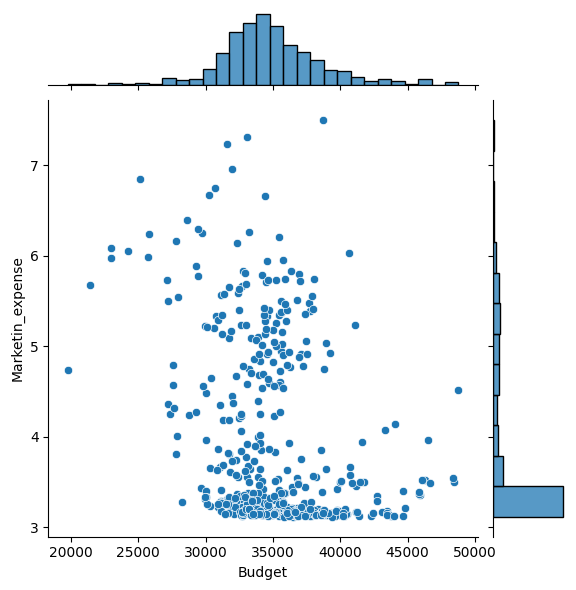

sb.jointplot(y="Marketin_expense", x="Production_expense", data=movie_colen_data) 


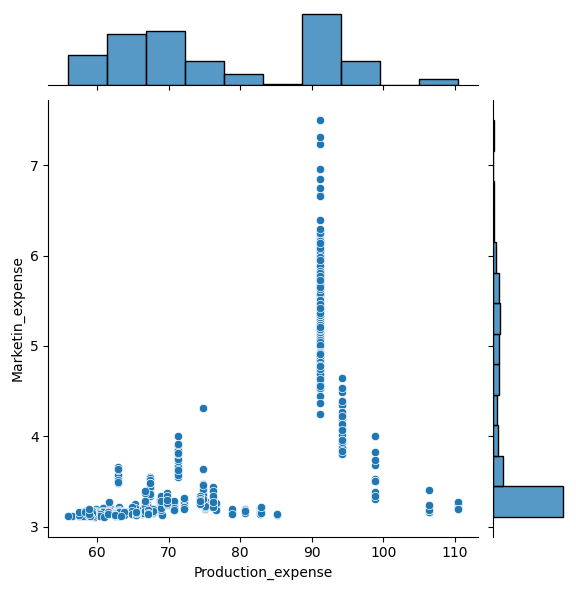

# Dummy variable creation for categorical values to be in numerical form 

movie_colen_data = pd.get_dummies(movie_colen_data)
movie_colen_data 
movie_colen_data[["Genre_Action", "Genre_Comedy", "Genre_Drama", "Genre_Thriller", "3D_available_NO", "3D_available_YES"]] = movie_colen_data[["Genre_Action", "Genre_Comedy", "Genre_Drama", "Genre_Thriller", "3D_available_NO", "3D_available_YES"]].astype(int) 
movie_colen_data 
print(movie_colen_data.info())
print(movie_colen_data.describe()) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           506 non-null    int64  
 1   Marketin_expense     506 non-null    float64
 2   Production_expense   506 non-null    float64
 3   Multiplex_coverage   506 non-null    float64
 4   Budget               506 non-null    float64
 5   Movie_length         506 non-null    float64
 6  

In [2]:
# %run "../Data_Preprocessing/data_preprocess.ipynb" 

with open("../Data_Preprocessing/data_preprocess.ipynb", "r", encoding="utf-8") as f:
    notebook1 = nbformat.read(f, as_version=4)

ipython = get_ipython() 

for cell in notebook1.cells:
    if cell.cell_type == "code":
        print(cell.source) 
        if ("hp_cleaned" in cell.source or "movies_data_cleaned" in cell.source or "hp_d" in cell.source or "movie_colen_data" in cell.source):
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try:
    print("Movies Clean Data:")
    print(movies_data_cleaned.head())   # type: ignore 
    print("\nHouse Price Cleaned Data:")
    print(hp_cleaned.head())   # type: ignore 
except NameError as e:
    print(f"Variable not found: {e}")

House Price Dataset :: 

In [3]:
hp_cleaned  # type: ignore 

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,Avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,1.100717,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,1.107674,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,1.107668,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,1.109344,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,1.121368,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,1.119274,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,1,2.4775,0,0,1,0
502,20.6,1.113590,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,1,2.2875,1,0,1,0
503,23.9,1.118663,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,1,2.1675,0,0,0,0
504,22.0,1.134491,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,1,2.3900,1,0,0,0


In [4]:
X = sm.add_constant(hp_cleaned['room_num'])     # type: ignore
X 

,const,room_num
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


In [5]:
# OLS = Odrinary List Square 

linear_model = sm.OLS(hp_cleaned['price'], X).fit()     # type: ignore
# linear_model    # --->> Object 
linear_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.31e-74
Time:                        19:25:32   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y = hp_cleaned['price']     # type: ignore 
y 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: price, Length: 506, dtype: float64

In [7]:
x = hp_cleaned[['room_num']]    # type: ignore 
x 

,room_num
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [8]:
linear_model2 = LinearRegression() 
linear_model2.fit(x, y)  

lm2_intercept = linear_model2.intercept_ 
lm2_coeff = linear_model2.coef_  
print("Linear model 2 intercept = ", lm2_intercept, "\nLinear model 2 coefficient = ", lm2_coeff[0])  

# print("Linear model 2 intercept = ", lm2_intercept, "\nLinear model 2 coefficient = ", lm2_coeff)   

Linear model 2 intercept =  -34.659243123097184 
Linear model 2 coefficient =  9.099669663064654


In [9]:
linear_model2.predict(x) 

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

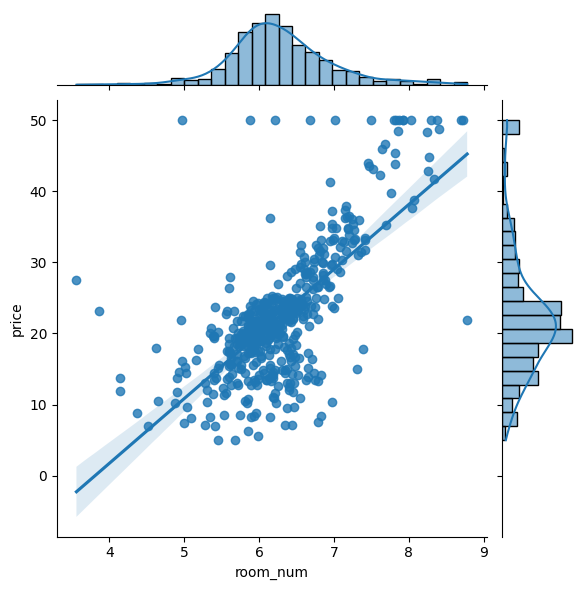

In [10]:
sb.jointplot(x=hp_cleaned['room_num'], y=hp_cleaned['price'], data=hp_cleaned, kind='reg')        # type: ignore 

In [11]:
help(linear_model2)    # more info for the model usage 

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speed

Help on JointGrid in module seaborn.axisgrid object:

class JointGrid(_BaseGrid)
 |  JointGrid(data=None, *, x=None, y=None, hue=None, height=6, ratio=5, space=0.2, palette=None, hue_order=None, hue_norm=None, dropna=False, xlim=None, ylim=None, marginal_ticks=False)
 |
 |  Grid for drawing a bivariate plot with marginal univariate plots.
 |
 |  Many plots can be drawn by using the figure-level interface :func:`jointplot`.
 |  Use this class directly when you need more flexibility.
 |
 |  Method resolution order:
 |      JointGrid
 |      _BaseGrid
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, data=None, *, x=None, y=None, hue=None, height=6, ratio=5, space=0.2, palette=None, hue_order=None, hue_norm=None, dropna=False, xlim=None, ylim=None, marginal_ticks=False)
 |      Set up the grid of subplots and store data internally for easy plotting.
 |
 |      Parameters
 |      ----------
 |      data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, 

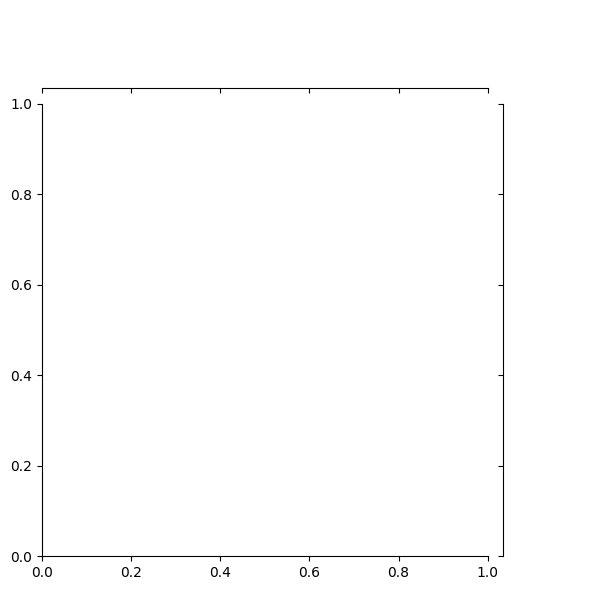

In [12]:
help(sb.jointplot()) 

Movies Collection Dataset ::

In [13]:
movies_data_cleaned   # type: ignore 

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,48000,3.112466,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,109.60,223.840,23,494,0,1,0,0,0,1
1,43200,3.130971,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,146.64,243.456,42,462,1,0,0,0,1,0
2,69400,3.130953,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,147.88,2022.400,38,458,0,0,0,1,0,0
3,66800,3.135381,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,185.36,225.344,45,472,0,1,0,0,1,0
4,72400,3.166782,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,176.48,225.792,55,395,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,44800,3.161357,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,...,186.96,243.584,27,561,1,0,1,0,0,0
502,41200,3.146537,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,...,132.24,263.296,20,600,1,1,1,0,0,0
503,47800,3.159771,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,...,109.56,243.824,31,576,1,0,0,1,0,0
504,44000,3.200378,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,...,158.80,303.520,47,607,1,1,0,1,0,0


In [14]:
x = sm.add_constant(movies_data_cleaned['Budget'])       # type: ignore 
x 

,const,Budget
0,1.0,36524.125
1,1.0,35668.655
2,1.0,39912.675
3,1.0,38873.890
4,1.0,39701.585
...,...,...
501,1.0,36624.115
502,1.0,33996.600
503,1.0,38751.680
504,1.0,37740.670


In [15]:
# OLS summarization 

linear_model3 = sm.OLS(movies_data_cleaned['Collection'], x).fit()       # type: ignore 
# linear_model3       # --->> object 
linear_model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Collection   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.31e-74
Time:                        19:25:33   Log-Likelihood:                -5517.7
No. Observations:                 506   AIC:                         1.104e+04
Df Residuals:                     504   BIC:                         1.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.932e+04   5284.272    -13.118      0.000   -7.97e+04   -5.89e+04
Budget         3.2762      0.150     21.779      0.000       2.981       3.572
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                     3.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y = movies_data_cleaned['Collection']      # type: ignore 
y 

0      48000
1      43200
2      69400
3      66800
4      72400
       ...  
501    44800
502    41200
503    47800
504    44000
505    38000
Name: Collection, Length: 506, dtype: int64

In [17]:
X = movies_data_cleaned[['Budget']]      # type: ignore 
X 

,Budget
0,36524.125
1,35668.655
2,39912.675
3,38873.890
4,39701.585
...,...
501,36624.115
502,33996.600
503,38751.680
504,37740.670


In [18]:
linear_model4 = LinearRegression() 
linear_model4.fit(X, y) 

lm4_intercept = linear_model4.intercept_ 
lm4_coeff = linear_model4.coef_ 
print("Linear_model 4 Intercept = ", lm4_intercept, "\nLinear model 4 coefficient = ", lm4_coeff[0]) 

# print("Linear_model 4 Intercept = ", lm4_intercept, "\nLinear model 4 coefficient = ", lm4_coeff)  

Linear_model 4 Intercept =  -69318.4862461944 
Linear model 4 coefficient =  3.2762086995732336


In [19]:
linear_model4.predict(X) 

array([50342.16982311, 47539.47156688, 61443.76681204, 58040.49035806,
       60752.19191765, 47703.26562082, 40095.9417825 , 43007.83607468,
       33161.99349924, 39950.34706789, 46738.70063653, 40041.34376452,
       37857.42304538, 38949.38340495, 41624.68628589, 36856.45938244,
       38694.59265438, 39695.55631732, 29977.10911717, 34909.13007455,
       32051.83380035, 39240.57283417, 42461.85589489, 36474.2732566 ,
       38494.3999218 , 32579.6146408 , 36474.2732566 , 40732.91865891,
       48886.22267702, 52143.90441639, 34654.33932398, 41187.90214206,
       38967.58274428, 34435.94725207, 41624.68628589, 38658.19397573,
       36983.85475773, 37147.64881166, 39258.77217349, 50706.15660963,
       58513.67318054, 53891.0409917 , 42953.2380567 , 43717.61030839,
       41133.30412408, 34090.15980487, 35982.89109479, 40423.52989037,
       28939.74677558, 32634.21265878, 39204.17415551, 41970.47373309,
       49177.41210623, 39841.15103193, 37839.22370605, 62608.52452892,
      

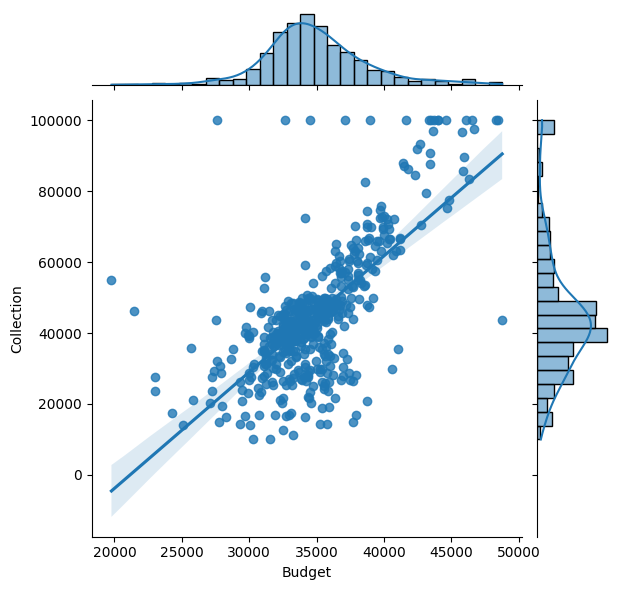

In [20]:
sb.jointplot(x=movies_data_cleaned['Budget'], y=movies_data_cleaned['Collection'], data=movies_data_cleaned, kind='reg')     # type: ignore 

In [21]:
help(linear_model4) 

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speed